# Training Dataset CSV Create

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

['train_2019.csv', 'selected_train.csv', 'train_all_2015_and_2019.csv', 'nonzero_train.csv', 'image_info.csv', 'train_2015.csv', 'test.csv', '.ipynb_checkpoints', 'test_2019.csv', 'train.csv', 'sample_submission.csv', 'sampled_train.csv', 'removed_train_2019.csv', 'duplicated_info.csv', 'train_images', 'test_images', 'aptos2019-blindness-detection', 'binary_train.csv']


In [2]:
INPUT_PATH = Path("../input").absolute()

In [3]:
train_2019 = pd.read_csv(INPUT_PATH / "train_2019.csv")
train_2015 = pd.read_csv(INPUT_PATH / "train_2015.csv")
test_2019 = pd.read_csv(INPUT_PATH / "test_2019.csv")
image_info = pd.read_csv(INPUT_PATH / "image_info.csv")
duplicated_info = pd.read_csv(INPUT_PATH / "duplicated_info.csv")

In [6]:
image_info.head()

,diagnosis,path,Size,Mode,Hash
0,2,../input/train_images/0c43c79e8cfb.png,"(2588, 1958)",RGB,d0664db1368a6779
1,4,../input/train_images/cd01672507c9.png,"(2588, 1958)",RGB,956a5aa525da4ab5
2,1,../input/train_images/3f73c91b7e32.png,"(2416, 1736)",RGB,81c1173f56e05e1f
3,0,../input/train_images/8bc6716c2238.png,"(2588, 1958)",RGB,946a45b64ae9b64b
4,0,../input/train_images/3abac0961bfd.png,"(1050, 1050)",RGB,c19d1f8e6ac03e1e


In [7]:
test_2019.head()

,id_code,size_info
0,0005cfc8afb6,"(480, 640, 3)"
1,003f0afdcd15,"(480, 640, 3)"
2,006efc72b638,"(480, 640, 3)"
3,00836aaacf06,"(480, 640, 3)"
4,009245722fa4,"(480, 640, 3)"


In [4]:
duplicated_info["id_code"] = [fp.split("/")[-1].split(".")[0] for fp in duplicated_info["path"]]
duplicated_info.head()

,Unnamed: 0,diagnosis,path,Size,Mode,Hash,id_code
0,1114,0,../input/train_images/a75bab2463d4.png,"(2416, 1736)",RGB,808d0f3513f33f2d,a75bab2463d4
1,833,0,../input/train_images/1632c4311fc9.png,"(2416, 1736)",RGB,808d0f3513f33f2d,1632c4311fc9
2,538,4,../input/train_images/6b00cb764237.png,"(2416, 1736)",RGB,808d17355ee51fa5,6b00cb764237
3,3241,2,../input/train_images/64678182d8a8.png,"(2416, 1736)",RGB,808d17355ee51fa5,64678182d8a8
4,1717,2,../input/train_images/8273fdb4405e.png,"(2416, 1736)",RGB,808d17715f871ff0,8273fdb4405e


In [5]:
dup_list = duplicated_info["id_code"]
removed_train_2019 = train_2019.query("id_code not in @dup_list")

In [6]:
temp_2019 = removed_train_2019.copy()
temp_2019["is_2019"] = True
temp_2015 = train_2015.copy()
temp_2015["is_2019"] = False
all_train = temp_2019.append(temp_2015)
print("len {}".format(len(all_train)))

len 38491


In [13]:
def pychart(df):
    label = {0: "No DR:0", 1: "Mild:1", 2: "Moderate:2", 3: "Severe:3", 4: "Proliferative:4"}
    fig, ax = plt.subplots(figsize=(6, 6))
    count = [len(df.query("diagnosis == {}".format(i))) for i in label.keys()]
    print(count)
    percentage = [c / len(df) for c in count]
    ax.pie(percentage, labels=label.values(), autopct="%1.1f%%", startangle=90)
    plt.show()

[27578, 2761, 6155, 1036, 961]


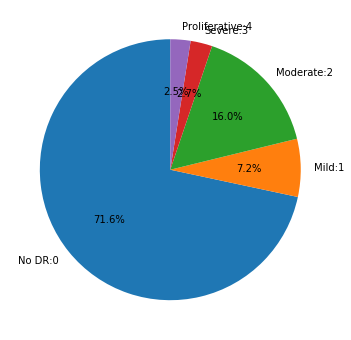

In [14]:
pychart(all_train)

[25810, 2443, 5292, 873, 708]


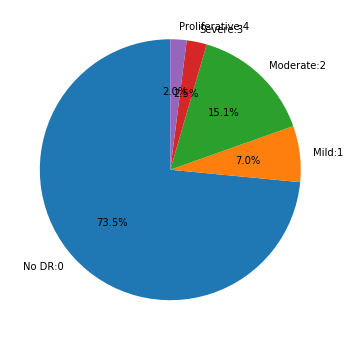

In [15]:
pychart(train_2015)

[1805, 370, 999, 193, 295]


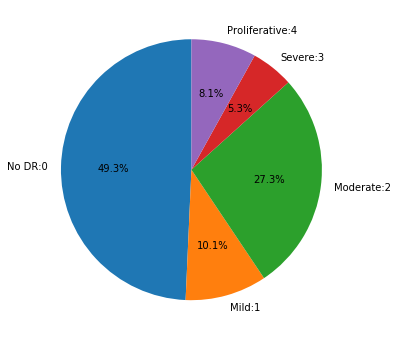

In [16]:
pychart(train_2019)

[10913, 2761, 6155, 1036, 961]


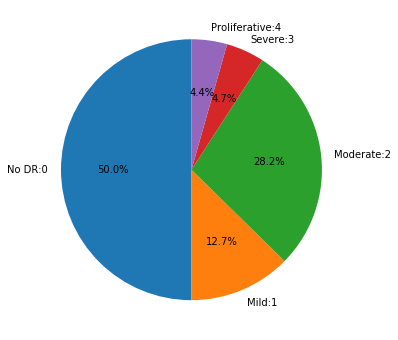

In [17]:
nonzero_df = all_train.query("diagnosis != 0")
nonzero_count = len(nonzero_df)
zero_df = all_train.query("diagnosis == 0").sample(frac=1, random_state=1116).reset_index(drop=True)
binary_train = nonzero_df.append(zero_df.iloc[:nonzero_count, :])
pychart(binary_train)

In [18]:
binary_train.to_csv(INPUT_PATH / "binary_train.csv", index=False)

[14.59841628959276, 7.682389937106918, 6.132097334878331, 5.355828220858895, 2.7984189723320156]


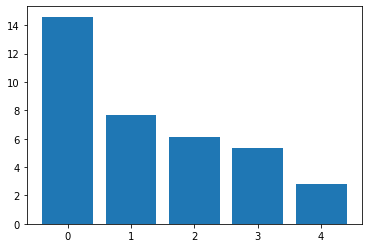

In [23]:
label = {0: "No DR:0", 1: "Mild:1", 2: "Moderate:2", 3: "Severe:3", 4: "Proliferative:4"}
count_2015 = [len(train_2015.query("diagnosis == {}".format(i))) for i in label.keys()]
count_2019 = [len(removed_train_2019.query("diagnosis == {}".format(i))) for i in label.keys()]

ratio = [count_2015[i] / count_2019[i] for i in range(5)]
print(ratio)
plt.bar(range(5), ratio)

<BarContainer object of 5 artists>

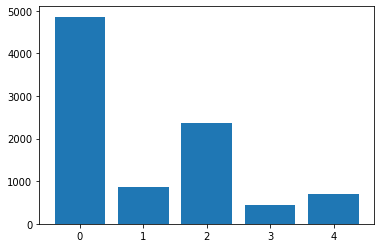

In [24]:
exp_ratio = 2.75
pick_count_2019 = [int(c * exp_ratio) for c in count_2019]
plt.bar(range(5), pick_count_2019)

[6630, 1192, 3236, 611, 948]


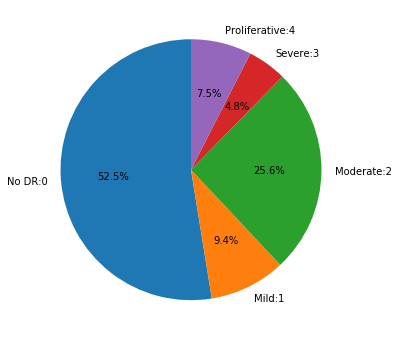

In [26]:
[train_2015.query("diagnosis == {}".format(i)).sample() for i in range(5)]

expand_train = removed_train_2019.copy()
expand_train["is_2019"] = True
for i in range(5):
    df = train_2015.query("diagnosis == {}".format(i))
    df = df.sample(frac=1, random_state=1116).reset_index(drop=True)
    df["is_2019"] = False
    expand_train = expand_train.append(df.iloc[:pick_count_2019[i], :])
pychart(expand_train)

[1768, 318, 863, 163, 253]


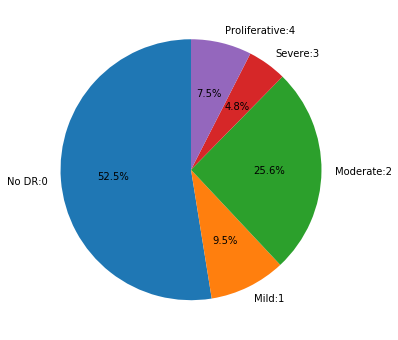

In [27]:
pychart(removed_train_2019)

In [28]:
expand_train.to_csv(INPUT_PATH / "expand_train.csv", index=False)

[4862, 874, 2373, 448, 695]


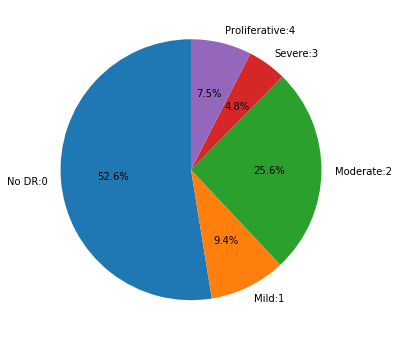

In [30]:
expand_pretrain = expand_train[~expand_train["is_2019"]]
pychart(expand_pretrain)

In [31]:
expand_pretrain.to_csv(INPUT_PATH / "expand_pretrain.csv", index=False)